In [39]:
import requests
import csv
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity


In [68]:
def movieRecommendations(title):
    linkdict={}
    z=[]
    d={}
    
    #column headers for the dataset
    item_cols = ['movieid','title','genres']
    link_cols = ['movieid','imdbid','tmdbid']
    
    #reading the csv file
    users = (pd.read_csv('movies.csv',names=item_cols,nrows=1000) )
    links=(pd.read_csv("links.csv",names=link_cols,nrows=1000))
    x=users.movieid.tolist()
    y=users.genres.tolist()
    x1=links.movieid.tolist()
    y1=links.tmdbid.tolist()
    
    
    for i in range(0,len(x1)):
        linkdict[x1[i]]=y1[i]
        
    
    
    for i in range(0,len(y)):
        z=y[i].split("|")
        y[i]=z
        z=[]
        
    
    for i in range(0,len(x)):
        if "(no genres listed)" in y[i]:
            y[i]=[]   
            
        if(math.isnan(y1[i])):
            y1[i]=0
        d[x[i]]=[y[i],int(y1[i])]
          
    
    
    for i in range(0,len(x)):
        genlist=list(d[x[i]])
        
        genstr=" ".join(str(x) for x in genlist[0])
        d[x[i]].append(genstr)
    
    veclist=list(d.values())
    for i in range(0,len(veclist)):
        veclist[i]=veclist[i][2]

    count = CountVectorizer(stop_words='english')
    count_matrix = count.fit_transform(veclist)

    cosine_sim2 = cosine_similarity(count_matrix, count_matrix)
    indices=pd.Series(users.index,index=users['title'])
    
    index_ = indices[title]
    sim_scores_ = list(enumerate(cosine_sim2[index_]))
    df = pd.DataFrame(sim_scores_, columns=['word', 'frequency'])
    df.plot(kind='bar', x='word',figsize=(100,100))
    sim_scores_ = sorted(sim_scores_, key=lambda x: x[1], reverse=True)
    sim_scores_=sim_scores_[1:11]
    
    movie_indices=[i[0] for i in sim_scores_]
    return users['title'].iloc[movie_indices]
    


22                                      Assassins (1995)
163                    Die Hard: With a Vengeance (1995)
183                                      Net, The (1995)
285                          Natural Born Killers (1994)
475                                Judgment Night (1993)
586                                        Batman (1989)
77                            Crossing Guard, The (1995)
168                                       Hackers (1995)
290    Léon: The Professional (a.k.a. The Professiona...
345                      Clear and Present Danger (1994)
Name: title, dtype: object

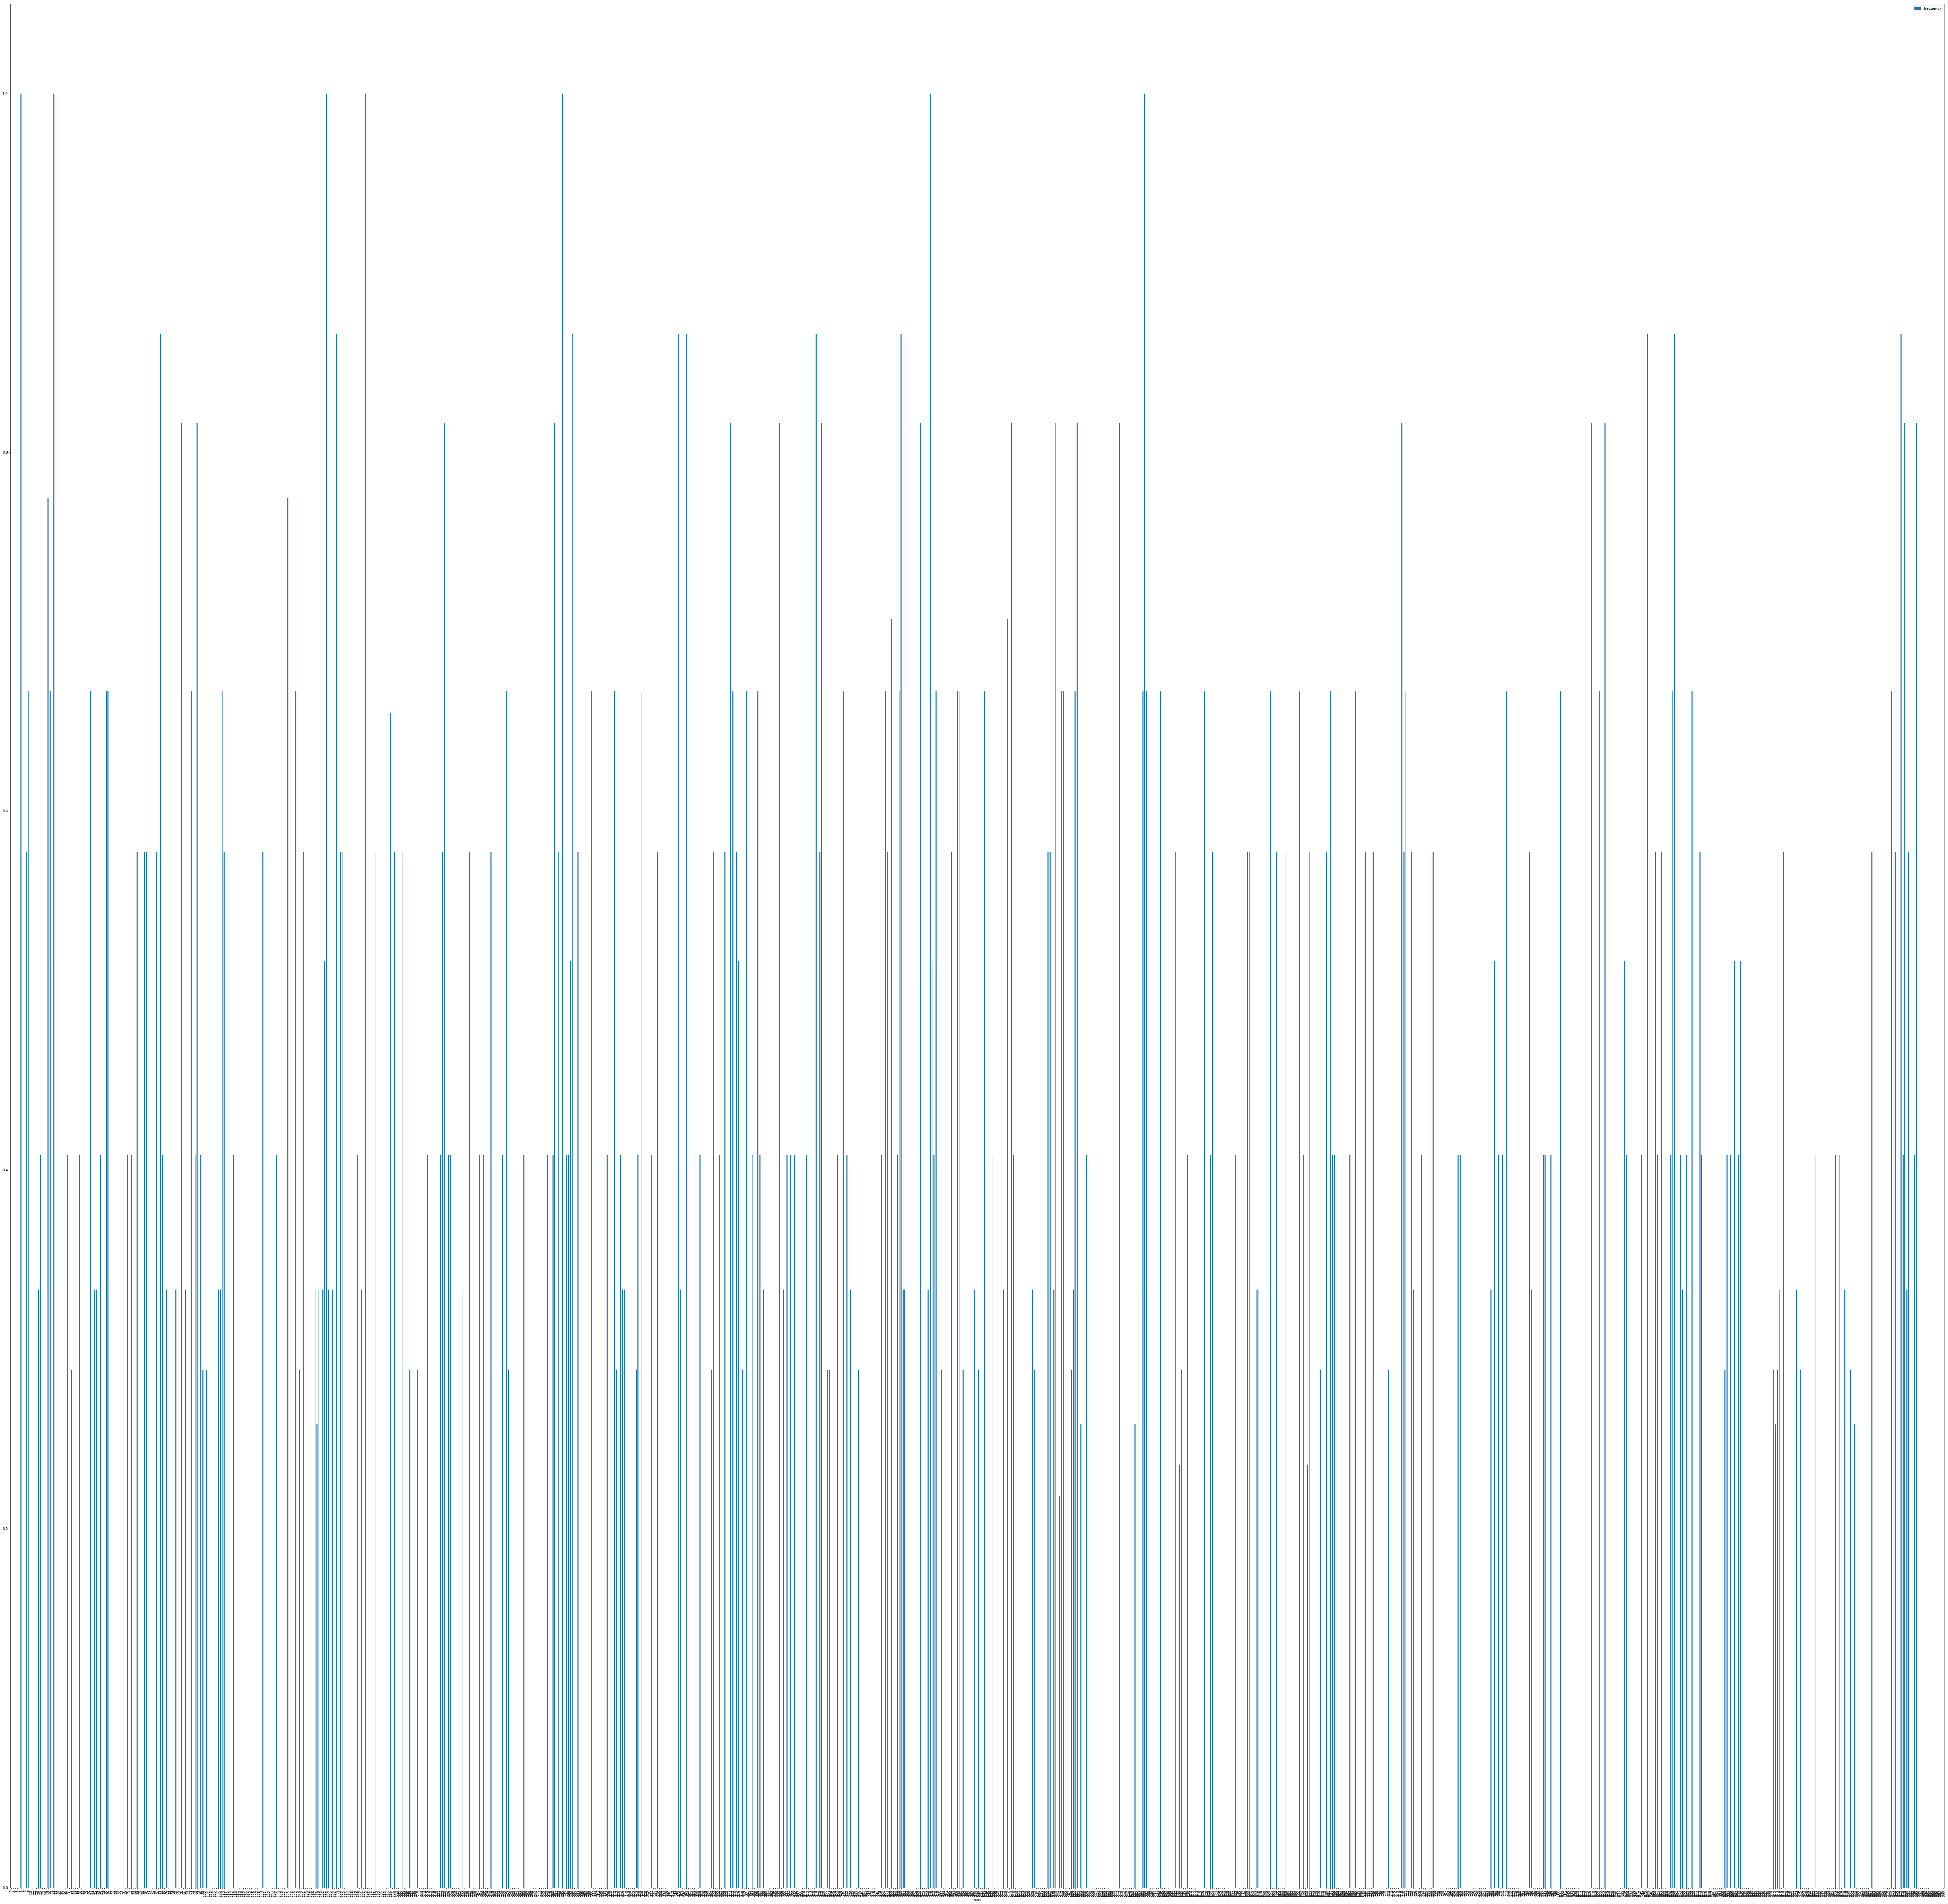

In [69]:
movieRecommendations('Heat (1995)')

In [79]:
def bookRecommendations(title):
    mergeList={}
    #column headers for the dataset
    items_cols=['title','author','genre','height','publisher']
    #reading the csv file
    users=(pd.read_csv('books.csv',names=items_cols,skiprows=[0]))
    titleList=users.title.tolist()
    authorList=users.author.tolist()
    genreList=users.genre.tolist()
    heightList=users.height.tolist()
    publisherList=users.publisher.tolist()
    cleanedPublisherList=[x for x in publisherList if str(x)!='nan']
    for i in range(0,len(cleanedPublisherList)):
        mergeList[i]=genreList[i]+' '+cleanedPublisherList[i]
    vecList=list(mergeList.values())
    
    if isinstance(vecList, list):
        [str.lower(i.replace("_", " ")) for i in vecList]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(vecList, str):
            str.lower(vecList.replace(" ", ""))
        
        
    count = CountVectorizer(stop_words='english')
    count_matrix = count.fit_transform(vecList)  
    cosine_sim2=cosine_similarity(count_matrix,count_matrix)
    indices=pd.Series(users.index,index=users['title'])
    index_=indices[title]
    sim_scores_=list(enumerate(cosine_sim2[index_]))
    df = pd.DataFrame(sim_scores_, columns=['word', 'frequency'])
    df.plot(kind='bar', x='word',figsize=(100,100))
    sim_scores_ = sorted(sim_scores_, key=lambda x: x[1], reverse=True)
    sim_scores_=sim_scores_[1:11]
    book_indices=[i[0] for i in sim_scores_]
    return users['title'].iloc[book_indices]


71                Prisoner of Birth, A
18                New Machiavelli, The
27                       Outsider, The
35                 Farewell to Arms, A
36                        Veteran, The
42    Tales of Mystery and Imagination
46                         Asami Asami
47                  Journal of a Novel
49                   Moon is Down, The
51                     In a Free State
Name: title, dtype: object

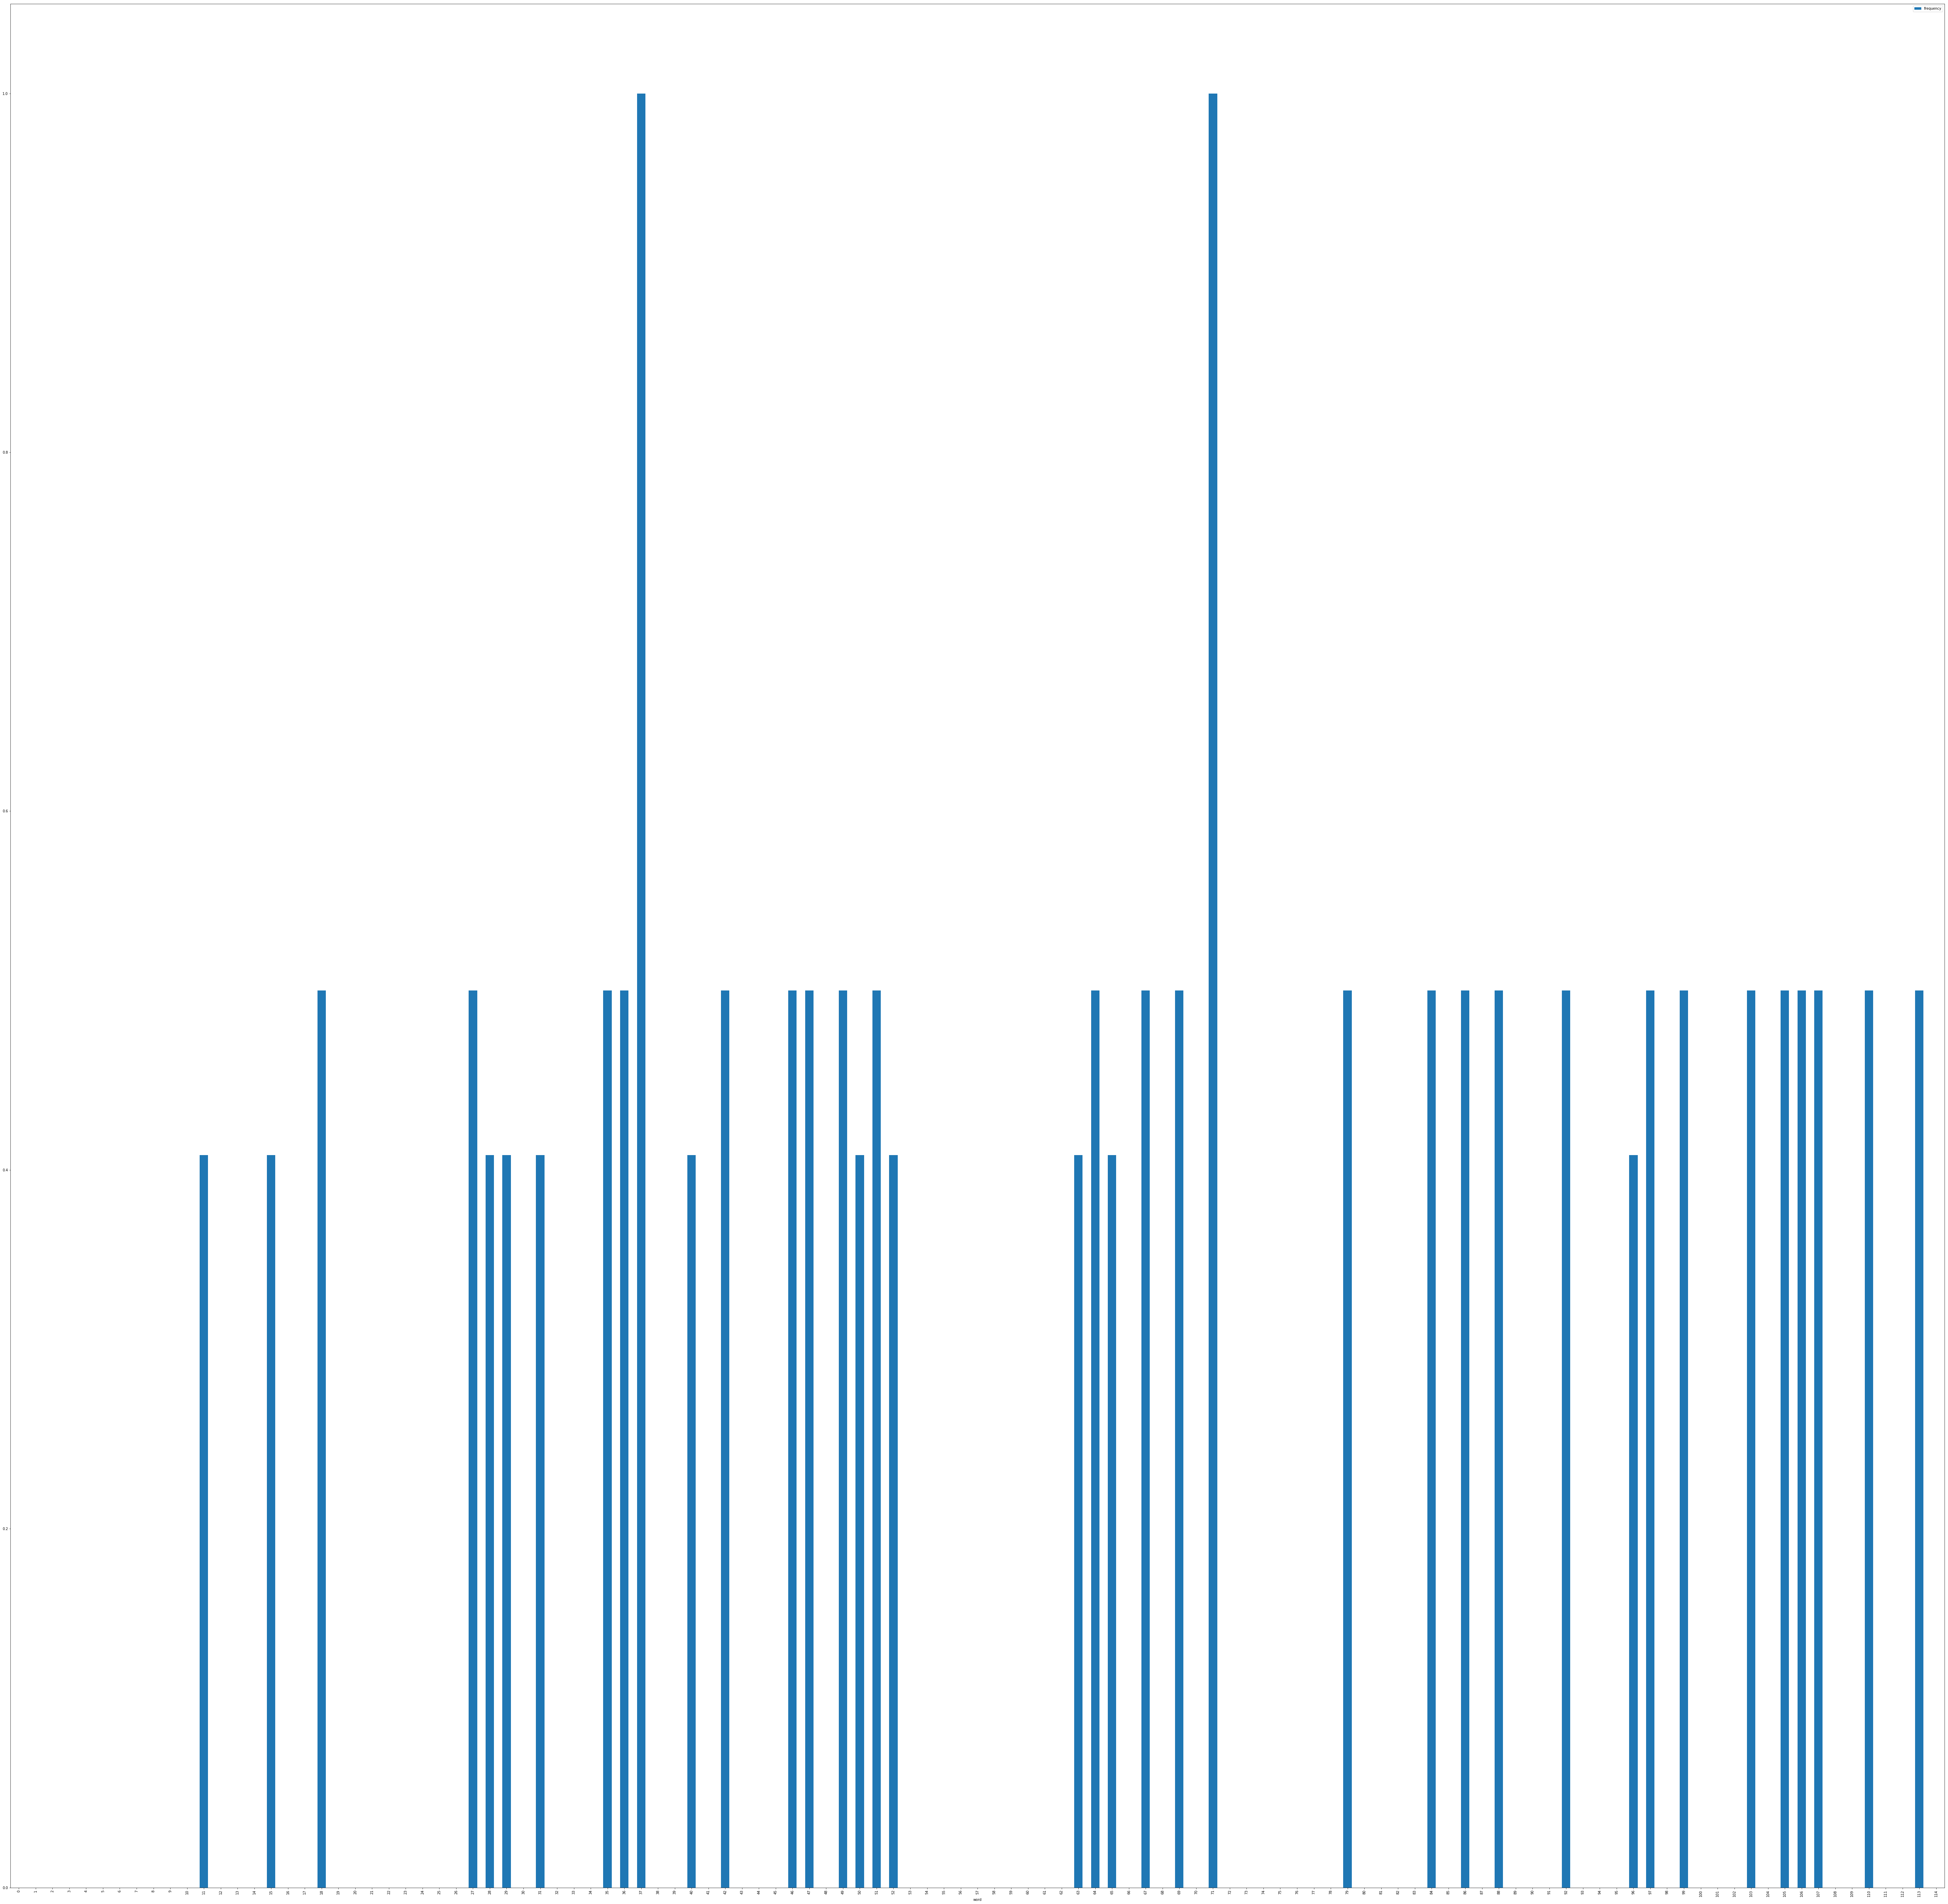

In [80]:
bookRecommendations('False Impressions')

In [84]:
def songRecommendations(title):
    mergeList={}
    #column headers for the dataset
    item_cols = ['title','genre','year']
    
    #reading the csv file
    users = (pd.read_csv('music.csv',names=item_cols))
    titleList=users.title.tolist()
    genreList=users.genre.tolist()
    yearList=users.year.tolist()
    
    for i in range(0,len(genreList)):
        mergeList[i]=str(genreList[i])+' '+str(yearList[i])
    
    vecList=list(mergeList.values())
    count = CountVectorizer(stop_words='english')
    count_matrix = count.fit_transform(vecList)
    
    cosine_sim2=cosine_similarity(count_matrix,count_matrix)
    indices=pd.Series(users.index,index=users['title'])
    
    index_=indices[title]
    sim_scores_=list(enumerate(cosine_sim2[index_]))
    df = pd.DataFrame(sim_scores_, columns=['word', 'frequency'])
    df.plot(kind='bar', x='word',figsize=(100,100))
    sim_scores_ = sorted(sim_scores_, key=lambda x: x[1], reverse=True)
    sim_scores_=sim_scores_[1:11]
    music_indices=[i[0] for i in sim_scores_]
    return users['title'].iloc[music_indices]



1756                    Im Slowly Turning Into You
2801    U Complete Me (Blues Version - Bonus Track)
2944                              Now I Got A Woman
3817                                   Ooh Wee Baby
3866                                Harlem Nocturne
4097                            Night is the Notion
5086               Heavy On My Mind (Album Version)
6160                                Radiation Blues
6406                                         Assouf
6874                   A Martyr For My Love For You
Name: title, dtype: object

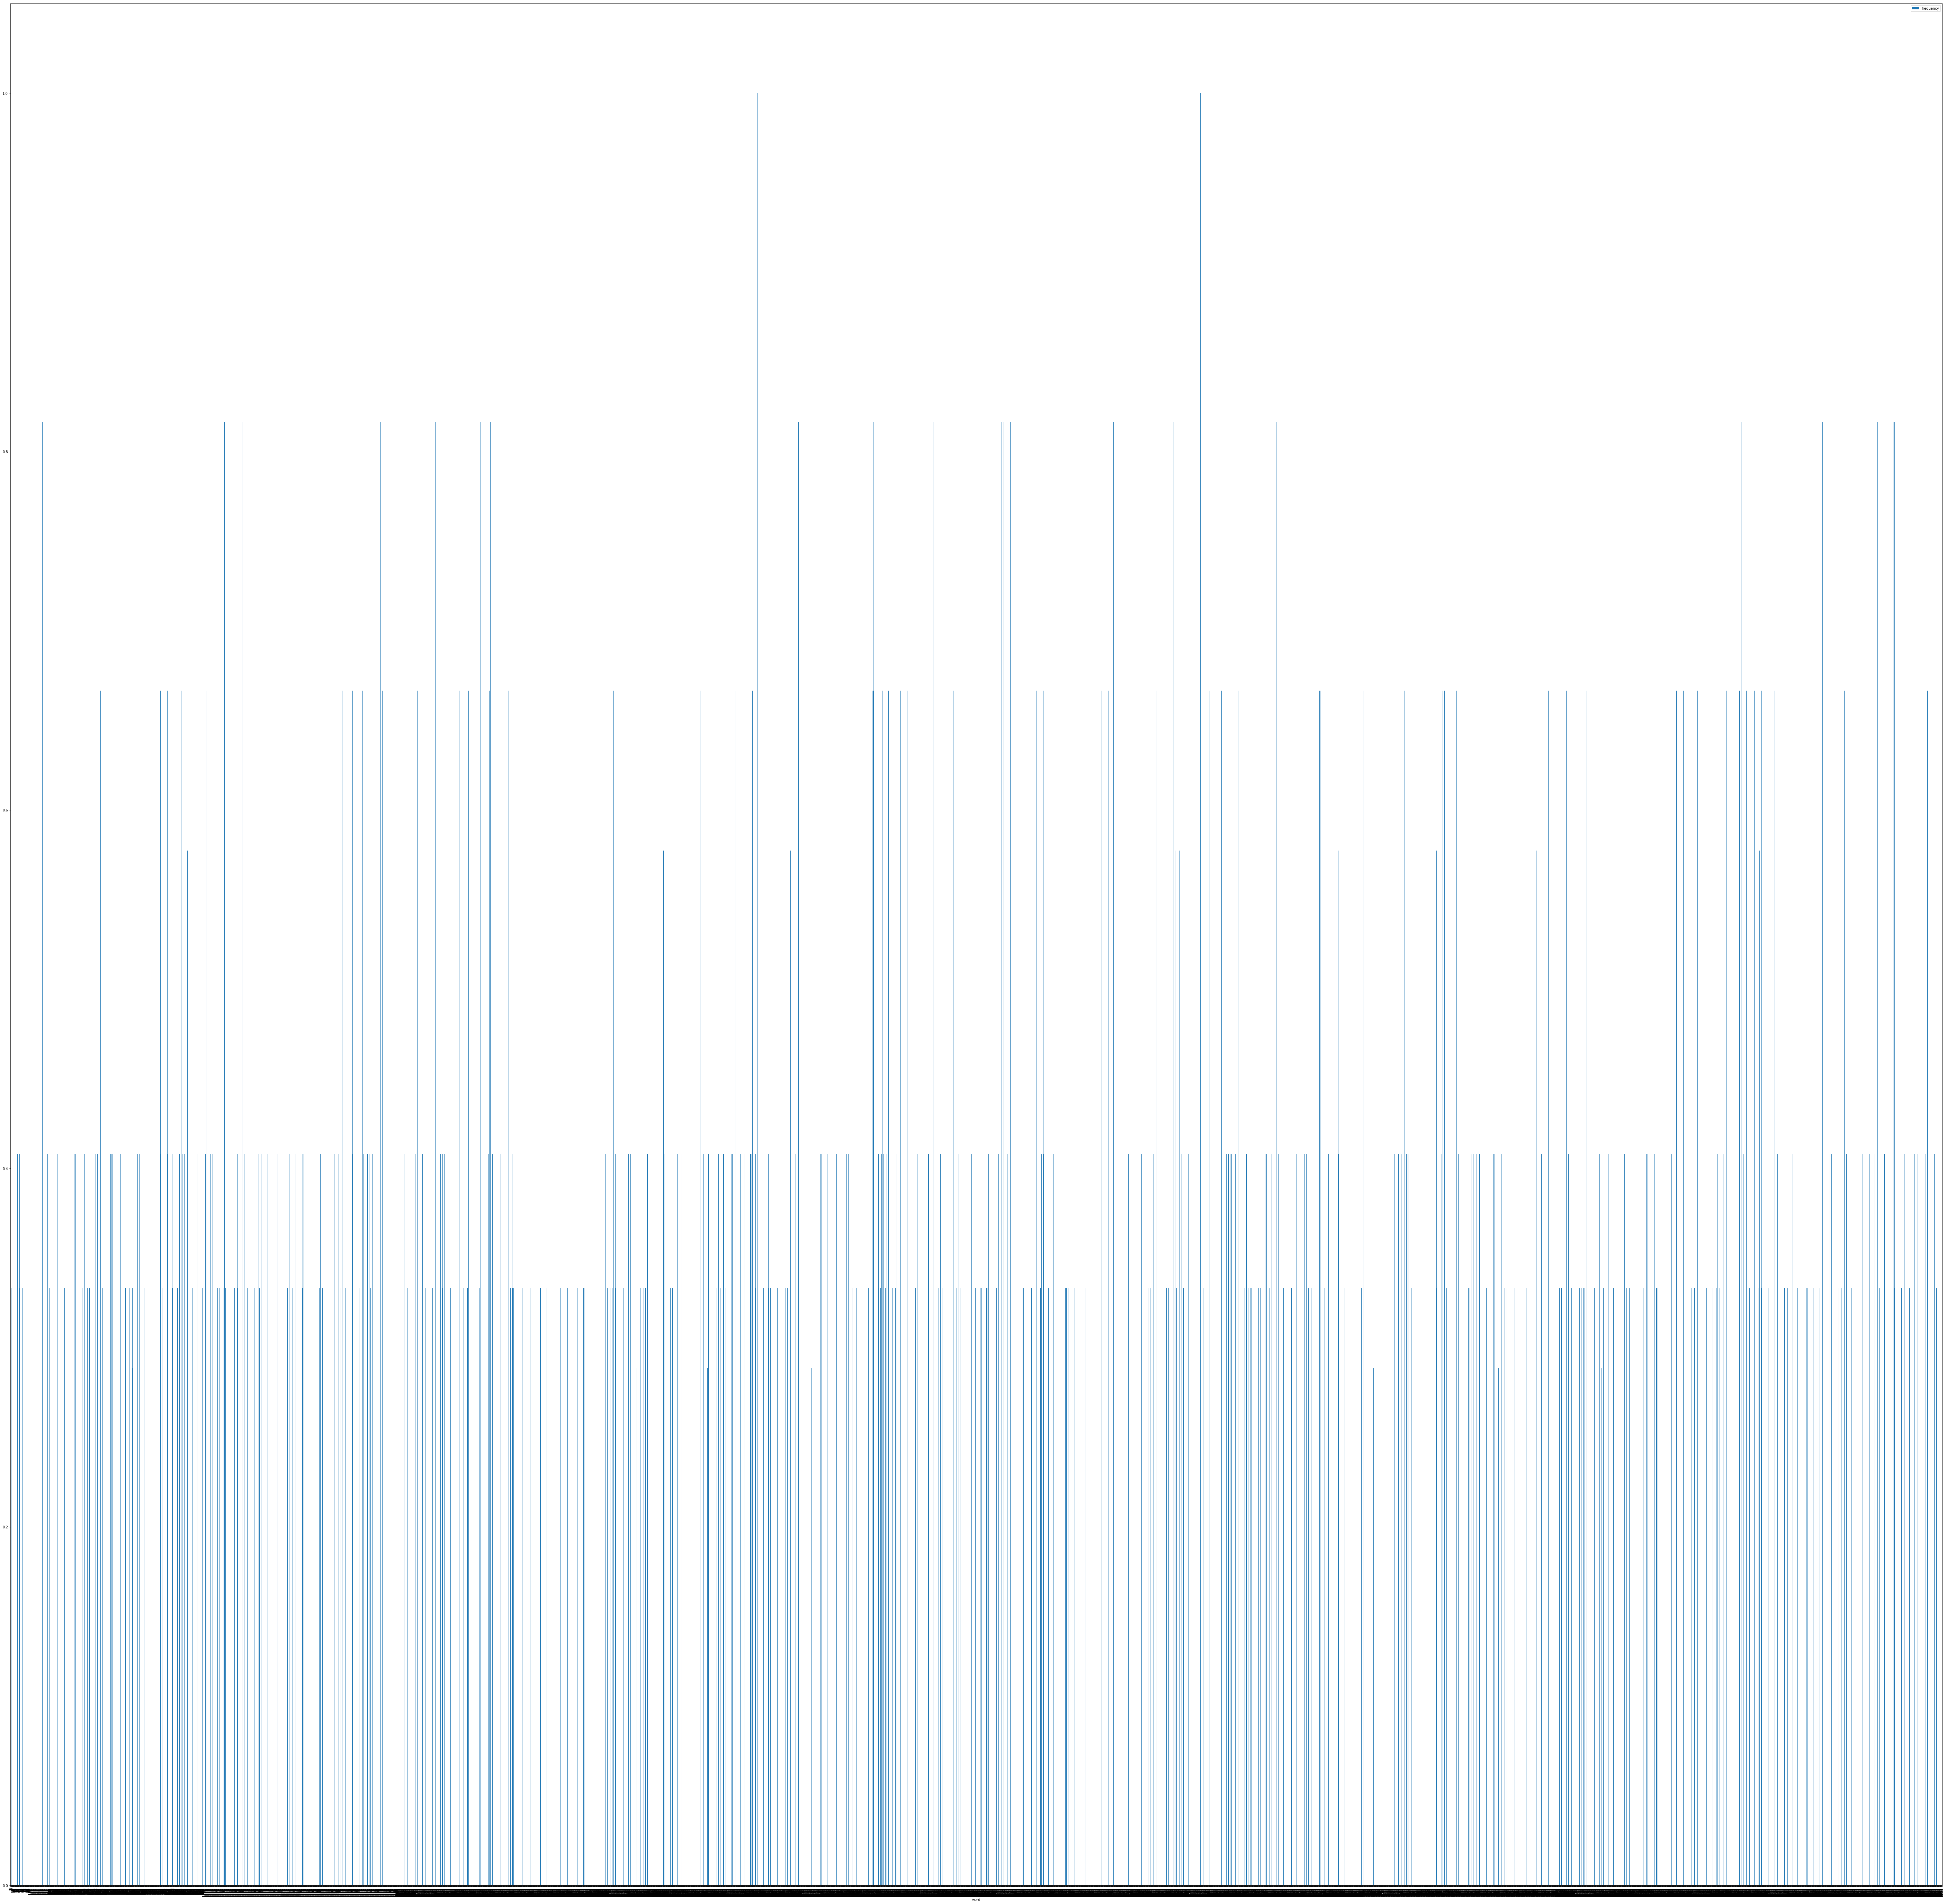

In [85]:
songRecommendations("Misty Mountains")